<a href="https://colab.research.google.com/github/ItzNotCheetah/Automobile-MPG-Predictor/blob/main/Automobile_MPG_Predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Modeling Nonlinear Vehicle Fuel Efficiency Using Polynomial Regression

# Importing the libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset

In [36]:
dataset = pd.read_csv('mpg.csv')
X = dataset['weight']
y = dataset['mpg']
X = X.to_frame()


In [33]:
print(X)

[3504 3693 3436 3433 3449 4341 4354 4312 4425 3850 3563 3609 3761 3086
 2372 2833 2774 2587 2130 1835 2672 2430 2375 2234 2648 4615 4376 4382
 4732 2130 2264 2228 2046 2634 3439 3329 3302 3288 4209 4464 4154 4096
 4955 4746 5140 2962 2408 3282 3139 2220 2123 2074 2065 1773 1613 1834
 1955 2278 2126 2254 2408 2226 4274 4385 4135 4129 3672 4633 4502 4456
 4422 2330 3892 4098 4294 4077 2933 2511 2979 2189 2395 2288 2506 2164
 2100 4100 3672 3988 4042 3777 4952 4464 4363 4237 4735 4951 3821 3121
 3278 2945 3021 2904 1950 4997 4906 4654 4499 2789 2279 2401 2379 2124
 2310 2472 2265 4082 4278 1867 2158 2582 2868 3399 2660 2807 3664 3102
 2875 2901 3336 1950 2451 1836 2542 3781 3632 3613 4141 4699 4457 4638
 4257 2219 1963 2300 1649 2003 2125 2108 2246 2489 2391 2000 3264 3459
 3432 3158 4668 4440 4498 4657 3907 3897 3730 3785 3039 3221 3169 2171
 2639 2914 2592 2702 2223 2545 2984 1937 3211 2694 2957 2945 2671 1795
 2464 2220 2572 2255 2202 4215 4190 3962 4215 3233 3353 3012 3085 2035
 2164 

# Taking care of missing data

In [37]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values= np.nan, strategy= 'mean')
imputer.fit(X)
X = imputer.transform(X)

# Training the Linear Regression model on the whole dataset

In [23]:
from sklearn.linear_model import LinearRegression
lin_regressor = LinearRegression()
lin_regressor.fit(X, y)

LinearRegression()

# Training the Polynomial Regression model on the whole dataset

In [27]:
from sklearn.preprocessing import PolynomialFeatures
poly_regressor = PolynomialFeatures(degree= 2)
X_poly = poly_regressor.fit_transform(X)
lin_regressor_2 = LinearRegression()
lin_regressor_2.fit(X_poly, y)

LinearRegression()

# Visualising the Linear Regression results

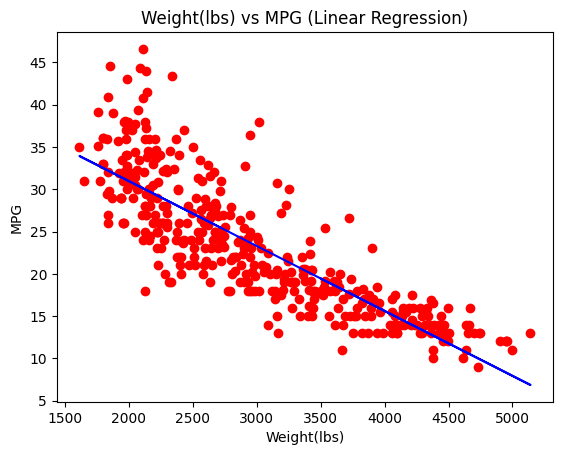

In [31]:
plt.scatter(X, y, color= 'red')
plt.plot(X, lin_regressor.predict(X), color= 'blue')
plt.title('Weight(lbs) vs MPG (Linear Regression)')
plt.xlabel('Weight(lbs)')
plt.ylabel('MPG')
plt.show()

# Visualising the Polynomial Regression results

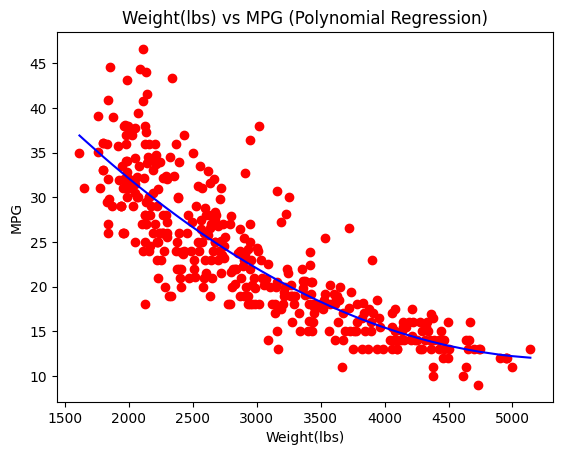

In [41]:
X_sorted = X.reshape(-1, 1)
X_sorted = X_sorted[np.argsort(X_sorted[:, 0])]
plt.scatter(X, y, color= 'red')
plt.plot(X_sorted, lin_regressor_2.predict(poly_regressor.fit_transform(X_sorted)), color= 'blue')
plt.title('Weight(lbs) vs MPG (Polynomial Regression)')
plt.xlabel('Weight(lbs)')
plt.ylabel('MPG')
plt.show()